<a href="https://colab.research.google.com/github/dhakehruturaj/Topics-in-Generative-AI/blob/main/Lab_Session4_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Session 4: GAN

## Convolutional Encoder

### Introduction
In this part of the lab session, we will start with understanding the basics of a Convolutional Encoder. This encoder forms the backbone of many modern deep learning models, especially in the field of image processing.

### What is a Convolutional Encoder?
A Convolutional Encoder is a neural network component that compresses an input image into a lower-dimensional representation (also known as a latent space or encoded vector). The goal is to extract the most important features of the image while reducing its size.

### Architecture of a Convolutional Encoder
The architecture of a Convolutional Encoder typically includes the following layers:

1. **Convolutional Layers**: These layers apply convolution operations to the input image, using filters to detect various features such as edges, textures, and shapes. Each convolutional layer is followed by an activation function, usually ReLU (Rectified Linear Unit), to introduce non-linearity.

2. **Pooling Layers**: Pooling layers (usually max pooling) reduce the spatial dimensions of the input by selecting the maximum value from a small region of the feature map. This helps in reducing the computational complexity and extracting dominant features.

3. **Fully Connected Layers (optional)**: Sometimes, fully connected layers are used after the convolutional and pooling layers to further compress the features into a one-dimensional vector. However, in some architectures, fully connected layers are not used to maintain spatial information.

### Conclusion
In this section, we have built a Convolutional Encoder to extract important features from an image while reducing its dimensionality. This encoder will serve as the foundation for more complex models, such as Variational Autoencoders and GANs, which we will explore in the subsequent sections.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=False,
                                  download=True, transform=transform)

In [9]:
# Create training and test dataloaders

num_workers = 2
# setting num_workers to a positive number would spawn that many data_loader processes, and use the multiple processes created to load the data. This way computation of the main code doesn't stop

# how many samples per batch to load
batch_size = 32

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

### Visualization

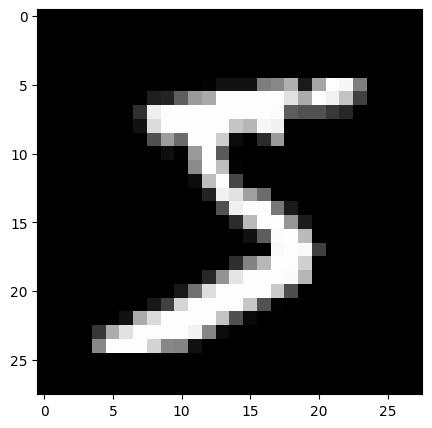

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter) #common mistake is using dataiter.next() which doesn't work anymore
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## What is an Encoder?

An **Encoder** is a neural network component that transforms the input data into a lower-dimensional representation. In the context of image processing, the encoder takes an image as input and compresses it into a smaller, more manageable size, while retaining the most important features. This lower-dimensional representation is often referred to as the latent space or encoded vector.

### Key Points:
- **Dimensionality Reduction**: The encoder reduces the dimensionality of the input data, making it easier to process.
- **Feature Extraction**: It extracts the most important features from the input data, which are essential for further processing or reconstruction.
- **Neural Network Layers**: The encoder typically consists of convolutional layers, pooling layers, and sometimes fully connected layers to achieve this compression.

## What is a Decoder?

A **Decoder** is a neural network component that reconstructs the original input data from the lower-dimensional representation produced by the encoder. In the context of image processing, the decoder takes the encoded vector and generates an output image that closely resembles the original input image.

### Key Points:
- **Reconstruction**: The decoder reconstructs the original data from the compressed representation.
- **Upsampling**: It typically involves upsampling techniques to increase the dimensionality of the encoded vector back to the original input size.
- **Neural Network Layers**: The decoder consists of layers that perform the opposite operations of the encoder, such as transposed convolutions and upsampling layers, to reconstruct the input data.

### Encoder-Decoder Framework
Together, the encoder and decoder form an **encoder-decoder** architecture, which is widely used in various applications such as image compression, image denoising, and more. The encoder compresses the input data into a compact representation, and the decoder reconstructs the data from this compact form.


## Example: Encoder and Decoder

### Example Scenario
To better understand how an encoder and decoder work together, let's walk through an example. Imagine we have an input image of size 28x28x1 (a grayscale image with 1 channel).

### Encoder Example
The encoder's goal is to compress this image into a smaller representation. For instance, one of the layers in the encoder might use max-pooling to reduce the spatial dimensions of the image.

- **Input Image**: 28x28x1
- **Max-Pool Layer Output**: 7x7x4

Here, the max-pool layer reduces the image size to 7x7 and increases the depth to 4. This 7x7x4 layer is the compressed representation of the original image. The size of this encoded vector is:

- **Final Encoder Layer Size**: 7x7x4 = 196

### Decoder Example
The decoder's goal is to take this compressed representation (7x7x4) and reconstruct it back to the original image size (28x28x1).

- **Encoded Vector**: 7x7x4 (196 values)
- **Original Image Size**: 28x28 = 784

The encoded vector is 25% the size of the original image. To reconstruct the original image, the decoder will work its way back up from this compressed representation. It typically involves upsampling techniques to increase the spatial dimensions.

### Upsampling Process
1. **Upsampling Layers**: The decoder uses layers that perform the opposite of max-pooling, such as transposed convolutions or upsampling layers.
2. **Layer-by-Layer Reconstruction**: The decoder gradually increases the spatial dimensions while reducing the depth until it matches the original image size.

### Summary
- **Final Encoder Layer**: 7x7x4 = 196 values (compressed representation)
- **Original Image**: 28x28x1 = 784 values
- **Compression Ratio**: The encoded vector is 25% the size of the original image.

These sizes are suggested for each of the layers, and you are encouraged to experiment with different depths and sizes. The ultimate goal is to find a compact representation of the input data while retaining the most important features.



## Transpose Convolutions and the Decoder

### Introduction
In the decoder, we use **transposed convolutional layers** to increase the width and height of the input layers. These layers are essentially the reverse of standard convolutional layers.

### How Transposed Convolutions Work
Transposed convolutional layers reverse the operation of convolutional layers.

- **Convolutional Layer**: A 3x3 kernel reduces a 3x3 patch in the input layer to a single unit in the output.
- **Transposed Convolutional Layer**: A single unit in the input layer is expanded to a 3x3 patch in the output.

In PyTorch, you can create these layers using [`nn.ConvTranspose2d`](https://pytorch.org/docs/stable/nn.html#convtranspose2d).

### Example
- **Convolution**: A 3x3 kernel with a stride of 1 on a 5x5 input produces a 3x3 output.
- **Transpose Convolution**: The same kernel on a 3x3 input produces a 5x5 output.

### Artifacts in Transpose Convolutions
One issue with transposed convolutions is the potential for artifacts, such as checkerboard patterns, in the final images. These artifacts result from the overlap in the kernels.

### Avoiding Artifacts
To avoid checkerboard artifacts:
- Ensure that the stride and kernel size are equal.
- Use resizing techniques like nearest neighbor or bilinear interpolation (upsampling) followed by a convolutional layer.

For more detailed information on avoiding these artifacts, refer to [this Distill article](http://distill.pub/2016/deconv-checkerboard/) by Augustus Odena et al.

### Summary
- **Transposed Convolutional Layers**: Reverse the operation of convolutional layers to increase spatial dimensions.
- **Artifacts**: Potential for checkerboard patterns due to kernel overlap.
- **Solutions**: Equalize stride and kernel size, or use upsampling techniques followed by convolutional layers.




### To Do: Build the Network

#### Build the Encoder
- Construct the encoder using a series of convolutional layers and pooling layers.
- The encoder will progressively reduce the spatial dimensions of the input while increasing the depth, extracting essential features.

#### Build the Decoder
- Construct the decoder using transpose convolutional layers.
- Recall that transpose convolutional layers can upsample an input by a factor of 2.
- Use a stride and kernel size of 2 for the transpose convolutional layers to achieve this upsampling.


In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        # Check documentation at https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # -------CONTINUE HERE-------

        # conv layer (depth from 1 --> 16), 3x3 kernels
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        # conv layer (depth from 16 --> 4), 3x3 kernels
        self.conv2 = nn.Conv2d(16, 4, 3, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)

        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)


    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x = self.pool(x)  # compressed representation

        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))

        return x

# initialize the NN
model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


## Training

In this section, we will write code to train the network. Our primary focus is on monitoring the training loss, rather than validation. After training, we will evaluate the test loss.

### Key Points
- **Data**: We are only concerned with images, not labels, which we will get from the `train_loader`.
- **Loss Function**: Since we are comparing pixel values in the input and output images, a regression loss function is appropriate. We will use `MSELoss` (Mean Squared Error Loss), which is suitable for comparing quantities rather than probabilistic values.

### Loss Calculation
We will compute the loss by comparing the output images with the input images as follows:
```python
loss = criterion(outputs, images)


In [5]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
# number of epochs to train the model
n_epochs = 10

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        #FOR DENOISING
        ## add random noise to the input images
        # noisy_imgs = images + noise_factor * torch.randn(*images.shape)
        # # Clip the images to be between 0 and 1
        # noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        #END DENOISING CODE
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)

    # print avg training statistics
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
        ))

Epoch: 1 	Training Loss: 1.404189
Epoch: 2 	Training Loss: 0.523334
Epoch: 3 	Training Loss: 0.441997
Epoch: 4 	Training Loss: 0.414357
Epoch: 5 	Training Loss: 0.400703
Epoch: 6 	Training Loss: 0.390492
Epoch: 7 	Training Loss: 0.382556
Epoch: 8 	Training Loss: 0.376287
Epoch: 9 	Training Loss: 0.371508
Epoch: 10 	Training Loss: 0.367511
Epoch: 11 	Training Loss: 0.364367
Epoch: 12 	Training Loss: 0.361898
Epoch: 13 	Training Loss: 0.359808
Epoch: 14 	Training Loss: 0.357838
Epoch: 15 	Training Loss: 0.355813
Epoch: 16 	Training Loss: 0.354202
Epoch: 17 	Training Loss: 0.352800
Epoch: 18 	Training Loss: 0.351581
Epoch: 19 	Training Loss: 0.350538
Epoch: 20 	Training Loss: 0.349581
Epoch: 21 	Training Loss: 0.348647
Epoch: 22 	Training Loss: 0.347832
Epoch: 23 	Training Loss: 0.347038
Epoch: 24 	Training Loss: 0.346255
Epoch: 25 	Training Loss: 0.345536
Epoch: 26 	Training Loss: 0.344855
Epoch: 27 	Training Loss: 0.344239
Epoch: 28 	Training Loss: 0.343682
Epoch: 29 	Training Loss: 0.3

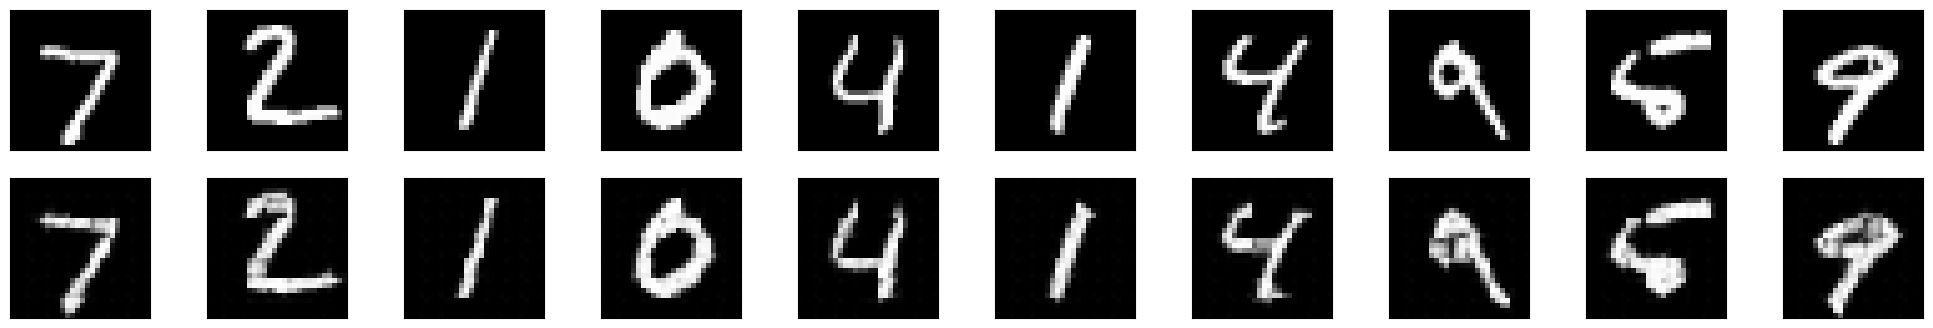

In [7]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# prep images for display
images = images.numpy()

# output is resized into a batch of iages
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

## Variational Autoencoder (VAE)

### Introduction
A Variational Autoencoder (VAE) is a type of autoencoder that introduces a probabilistic approach to learning latent representations. Unlike traditional autoencoders, VAEs assume that the latent space is continuous and follows a specific distribution (usually Gaussian), which allows for generating new data points by sampling from this latent space.

### Components of a VAE
A VAE consists of three main components:
1. **Encoder**: Maps the input data to a latent space by learning the mean and variance of the distribution.
2. **Latent Space**: A continuous, probabilistic space where each point corresponds to a possible representation of the input data.
3. **Decoder**: Reconstructs the input data from the latent representation sampled from the distribution.

### How VAEs Work
1. **Encoding**:
    - The encoder maps the input `x` to a latent space `z`.
    - Instead of directly mapping `x` to `z`, the encoder learns the mean `μ` and standard deviation `σ` of the latent space.
    - The latent variable `z` is then sampled from a Gaussian distribution with mean `μ` and variance `σ^2`.

2. **Reparameterization Trick**:
    - To backpropagate through the stochastic sampling process, VAEs use the reparameterization trick.
    - Instead of sampling `z` directly, we sample `ε` from a standard normal distribution and compute `z` as:
    ```
    z = μ + σ * ε
    ```

3. **Decoding**:
    - The decoder takes the sampled latent variable `z` and reconstructs the original input `x̂`.

### Loss Function
The loss function in VAEs is composed of two parts:
1. **Reconstruction Loss**: Measures how well the decoder reconstructs the input. This is usually computed as the Mean Squared Error (MSE) between the input and the reconstructed output.
2. **KL Divergence**: Measures the difference between the learned latent distribution and the prior distribution (usually a standard normal distribution). This regularizes the latent space to follow the desired distribution.

The total loss is the sum of these two terms:


#### Comparison of Convolutional Autoencoder vs. Variational Autoencoder (VAE)

| Aspect                      | Convolutional Autoencoder                                     | Variational Autoencoder (VAE)                                |
|-----------------------------|---------------------------------------------------------------|---------------------------------------------------------------|
| **Objective**               | Learn a compressed representation to accurately reconstruct input data. | Learn a probabilistic distribution to generate new samples and reconstruct input data. |
| **Approach**                | Deterministic encoding and decoding.                         | Probabilistic encoding and decoding.                         |
| **Latent Space Representation** | Fixed, deterministic latent vector.                           | Probabilistic distribution over latent space (usually Gaussian). |
| **Sampling**                | Not applicable.                                               | Uses stochastic sampling from learned distribution.           |
| **Reparameterization**      | Not required.                                                 | Uses reparameterization trick to enable gradient-based optimization. |
| **Loss Function**           | Primarily reconstruction loss (e.g., Mean Squared Error).     | Combination of reconstruction loss and KL Divergence.         |
| **Generative Capabilities** | Limited; primarily used for reconstruction.                   | Strong; can generate diverse new samples by sampling from latent space. |
| **Applications**            | Dimensionality reduction, feature learning, denoising.        | Data generation, anomaly detection, representation learning, and probabilistic modeling. |


In [2]:
cuda = False
DEVICE = torch.device("cuda" if cuda else "cpu")


batch_size = 100

x_dim  = 784
hidden_dim = 400
latent_dim = 200

lr = 1e-3
# epochs = 30
epochs = 10

In [3]:
class Encoder(nn.Module):

    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()

        self.FC_input = nn.Linear(input_dim, hidden_dim)
        self.FC_input2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_mean  = nn.Linear(hidden_dim, latent_dim)
        self.FC_var   = nn.Linear (hidden_dim, latent_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

        self.training = True

    def forward(self, x):
        h_       = self.LeakyReLU(self.FC_input(x))
        h_       = self.LeakyReLU(self.FC_input2(h_))
        mean     = self.FC_mean(h_)
        log_var  = self.FC_var(h_)                     # encoder produces mean and log of variance
                                                       #             (i.e., parateters of simple tractable normal distribution "q"

        return mean, log_var

In [4]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.FC_hidden = nn.Linear(latent_dim, hidden_dim)
        self.FC_hidden2 = nn.Linear(hidden_dim, hidden_dim)
        self.FC_output = nn.Linear(hidden_dim, output_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        h     = self.LeakyReLU(self.FC_hidden(x))
        h     = self.LeakyReLU(self.FC_hidden2(h))

        x_hat = torch.sigmoid(self.FC_output(h))
        return x_hat

In [5]:
class Model(nn.Module):
    def __init__(self, Encoder, Decoder):
        super(Model, self).__init__()
        self.Encoder = Encoder
        self.Decoder = Decoder

    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(DEVICE)        # sampling epsilon
        z = mean + var*epsilon                          # reparameterization trick
        return z


    def forward(self, x):
        mean, log_var = self.Encoder(x)
        z = self.reparameterization(mean, torch.exp(0.5 * log_var)) # takes exponential function (log var -> var)
        x_hat            = self.Decoder(z)

        return x_hat, mean, log_var

In [6]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder).to(DEVICE)

In [7]:
from torch.optim import Adam

BCE_loss = nn.BCELoss()

def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD


optimizer = Adam(model.parameters(), lr=lr)

In [10]:
print("Start training VAE...")
model.train()

for epoch in range(epochs):
    overall_loss = 0
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(-1, 784)
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)

        overall_loss += loss.item()

        loss.backward()
        optimizer.step()

    print("\tEpoch", epoch + 1, "complete!", "\tAverage Loss: ", overall_loss / (batch_idx*batch_size))

Start training VAE...
	Epoch 1 complete! 	Average Loss:  156.47636872803517
	Epoch 2 complete! 	Average Loss:  120.87915530047015
	Epoch 3 complete! 	Average Loss:  114.358950347249
	Epoch 4 complete! 	Average Loss:  111.77059531033738
	Epoch 5 complete! 	Average Loss:  110.24286868605313
	Epoch 6 complete! 	Average Loss:  109.20488120194051
	Epoch 7 complete! 	Average Loss:  108.44025958945683
	Epoch 8 complete! 	Average Loss:  107.86252077768299
	Epoch 9 complete! 	Average Loss:  107.28650041578165
	Epoch 10 complete! 	Average Loss:  106.92824755152618
	Epoch 11 complete! 	Average Loss:  106.48936970485822
	Epoch 12 complete! 	Average Loss:  106.1292555858893
	Epoch 13 complete! 	Average Loss:  105.86449682343604
	Epoch 14 complete! 	Average Loss:  105.54473402253338
	Epoch 15 complete! 	Average Loss:  105.31101654687839
	Epoch 16 complete! 	Average Loss:  105.15255149833166
	Epoch 17 complete! 	Average Loss:  105.04371621082025
	Epoch 18 complete! 	Average Loss:  104.81287125920282


In [11]:
with torch.no_grad():
    noise = torch.randn(batch_size, latent_dim).to(DEVICE)
    generated_images = decoder(noise)

In [12]:
def show_image(x, idx):
    x = x.view(batch_size, 28, 28)

    fig = plt.figure()
    plt.imshow(x[idx].cpu().numpy())

In [15]:
import matplotlib.pyplot as plt

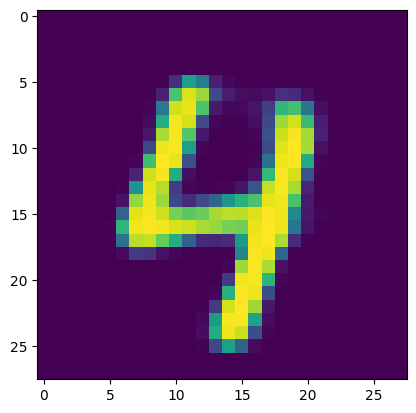

In [16]:
show_image(generated_images, idx=12)


---

## GAN

## Generative Adversarial Networks (GANs)

### Introduction
Generative Adversarial Networks (GANs) are a class of machine learning frameworks introduced by Ian Goodfellow in 2014. GANs consist of two neural networks, the **Generator** and the **Discriminator**, which compete against each other in a game-theoretic framework. The goal of GANs is to generate realistic data that mimics a given distribution.

### Components of GANs

1. **Generator (G)**:
    - **Purpose**: Generates fake data samples that resemble real data.
    - **How It Works**: Takes random noise (latent vector) as input and produces data samples (e.g., images) as output. The generator aims to create samples that are indistinguishable from real data.

2. **Discriminator (D)**:
    - **Purpose**: Distinguishes between real data samples and fake data generated by the generator.
    - **How It Works**: Takes data samples as input and outputs a probability indicating whether the sample is real (from the dataset) or fake (from the generator). The discriminator’s goal is to correctly classify the data as real or fake.

### Training Process

1. **Adversarial Training**:
    - GANs are trained through a process where the generator and discriminator are in a constant state of competition.
    - **Generator's Objective**: Minimize the probability that the discriminator correctly identifies the generated data as fake. The generator tries to fool the discriminator by generating increasingly realistic data.
    - **Discriminator's Objective**: Maximize the probability of correctly classifying data samples as real or fake. The discriminator provides feedback to the generator about the quality of generated samples.

2. **Loss Functions**:
    - **Generator Loss**: The loss for the generator is derived from the discriminator’s feedback. It is typically defined as:
    
   $$\text{Loss}_G = -\log(D(G(z)))$$

      where \( D(G(z)) \) is the discriminator's probability of the generated sample being real.

    - **Discriminator Loss**: The loss for the discriminator is a combination of two terms:
      $$\text{Loss}_D = -[\log(D(x)) + \log(1 - D(G(z)))]$$
      where \( D(x) \) is the probability of a real sample being classified as real, and \( D(G(z)) \) is the probability of a generated sample being classified as real.

### Objectives and Game Theory

- **Game Theoretic Framework**: GANs are formulated as a two-player minimax game, where the generator and discriminator have opposing objectives.
- **Equilibrium**: The ideal equilibrium is reached when the generator produces data samples that are indistinguishable from real data, and the discriminator cannot reliably distinguish between real and fake samples.

### Challenges

1. **Mode Collapse**:
    - The generator may produce limited variations of data, effectively ignoring some modes of the data distribution.
  
2. **Training Stability**:
    - GANs can be challenging to train due to the delicate balance required between the generator and discriminator. Training dynamics can be unstable, leading to convergence issues.

3. **Evaluation**:
    - Evaluating the performance of GANs is difficult since there is no single metric that can fully capture the quality of generated samples.

### Applications

- **Image Generation**: Creating realistic images from random noise, including deepfakes and art generation.
- **Data Augmentation**: Generating synthetic data to augment training datasets for other machine learning tasks.
- **Style Transfer**: Applying artistic styles to images or transferring the style of one image to another.
- **Super-Resolution**: Enhancing the resolution of images, generating high-resolution images from low-resolution inputs.

### Variants of GANs

- **Conditional GANs (cGANs)**: Extend GANs by conditioning the generation process on additional information, such as labels.
- **Deep Convolutional GANs (DCGANs)**: Use convolutional layers to improve image generation and stabilize training.
- **Wasserstein GANs (WGANs)**: Address some of the training issues by using a different loss function based on Wasserstein distance.

### Summary

Generative Adversarial Networks are a powerful framework for generating realistic data and learning complex data distributions. By leveraging adversarial training, GANs can create high-quality synthetic data and have a wide range of applications in computer vision and beyond. However, training GANs requires careful tuning and can be challenging due to issues like mode collapse and instability.


In [ ]:
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH = './data'
BATCH_SIZE = 128
IMAGE_CHANNEL = 1
Z_DIM = 100
G_HIDDEN = 64
X_DIM = 64
D_HIDDEN = 64
EPOCH_NUM = 5
REAL_LABEL = 1
FAKE_LABEL = 0
lr = 3e-4
seed = 42

In [ ]:
dataset = dset.MNIST(root=DATA_PATH, download=True,
                     transform=transforms.Compose([
                     transforms.Resize(X_DIM),
                     transforms.ToTensor(),
                     transforms.Normalize((0.5,), (0.5,))
                     ]))

dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=2)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [23]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input layer
            nn.ConvTranspose2d(Z_DIM, G_HIDDEN * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 8),
            nn.ReLU(True),
            # 1st hidden layer
            nn.ConvTranspose2d(G_HIDDEN * 8, G_HIDDEN * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 4),
            nn.ReLU(True),
            # 2nd hidden layer
            nn.ConvTranspose2d(G_HIDDEN * 4, G_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN * 2),
            nn.ReLU(True),
            # 3rd hidden layer
            nn.ConvTranspose2d(G_HIDDEN * 2, G_HIDDEN, 4, 2, 1, bias=False),
            nn.BatchNorm2d(G_HIDDEN),
            nn.ReLU(True),
            # output layer
            nn.ConvTranspose2d(G_HIDDEN, IMAGE_CHANNEL, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [24]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 1st layer
            nn.Conv2d(IMAGE_CHANNEL, D_HIDDEN, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 2nd layer
            nn.Conv2d(D_HIDDEN, D_HIDDEN * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 3rd layer
            nn.Conv2d(D_HIDDEN * 2, D_HIDDEN * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # 4th layer
            nn.Conv2d(D_HIDDEN * 4, D_HIDDEN * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(D_HIDDEN * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # output layer
            nn.Conv2d(D_HIDDEN * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1, 1).squeeze(1)

In [25]:
# Create the generator
netG = Generator().to(device)
netG.apply(weights_init)

# Create the discriminator
netD = Discriminator().to(device)
netD.apply(weights_init)

Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [26]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that I will use to visualize the progression of the generator
viz_noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)

# Setup Adam optimizers for both G and D
optimizerD = optim.AdamW(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.AdamW(netG.parameters(), lr=lr, betas=(0.5, 0.999))

In [27]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
for epoch in range(EPOCH_NUM):
    for i, data in enumerate(dataloader, 0):

        # (1) Update the discriminator with real data
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), REAL_LABEL, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        # (2) Update the discriminator with fake data
        # Generate batch of latent vectors
        noise = torch.randn(b_size, Z_DIM, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(FAKE_LABEL)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        # (3) Update the generator with fake data
        netG.zero_grad()
        label.fill_(REAL_LABEL)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 100 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, EPOCH_NUM, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == EPOCH_NUM-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(viz_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/5][0/469]	Loss_D: 1.3768	Loss_G: 7.2565	D(x): 0.6240	D(G(z)): 0.5125 / 0.0012
[0/5][100/469]	Loss_D: 0.3086	Loss_G: 5.7702	D(x): 0.9418	D(G(z)): 0.2078 / 0.0043
[0/5][200/469]	Loss_D: 0.4144	Loss_G: 3.1094	D(x): 0.8178	D(G(z)): 0.1601 / 0.0586
[0/5][300/469]	Loss_D: 0.2575	Loss_G: 4.4432	D(x): 0.9789	D(G(z)): 0.1987 / 0.0168
[0/5][400/469]	Loss_D: 0.7494	Loss_G: 1.3503	D(x): 0.6040	D(G(z)): 0.1033 / 0.2995
[1/5][0/469]	Loss_D: 0.5848	Loss_G: 4.3207	D(x): 0.9146	D(G(z)): 0.3489 / 0.0203
[1/5][100/469]	Loss_D: 1.0529	Loss_G: 0.7280	D(x): 0.4535	D(G(z)): 0.1489 / 0.5233
[1/5][200/469]	Loss_D: 0.5486	Loss_G: 2.3019	D(x): 0.7921	D(G(z)): 0.2369 / 0.1289
[1/5][300/469]	Loss_D: 0.6115	Loss_G: 4.4539	D(x): 0.9328	D(G(z)): 0.3838 / 0.0176
[1/5][400/469]	Loss_D: 2.7895	Loss_G: 0.3635	D(x): 0.0950	D(G(z)): 0.0140 / 0.7202
[2/5][0/469]	Loss_D: 0.2912	Loss_G: 2.5917	D(x): 0.8853	D(G(z)): 0.1409 / 0.0944
[2/5][100/469]	Loss_D: 0.5384	Loss_G: 1.5482	D(x): 0.6393	D(G(z)): 

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

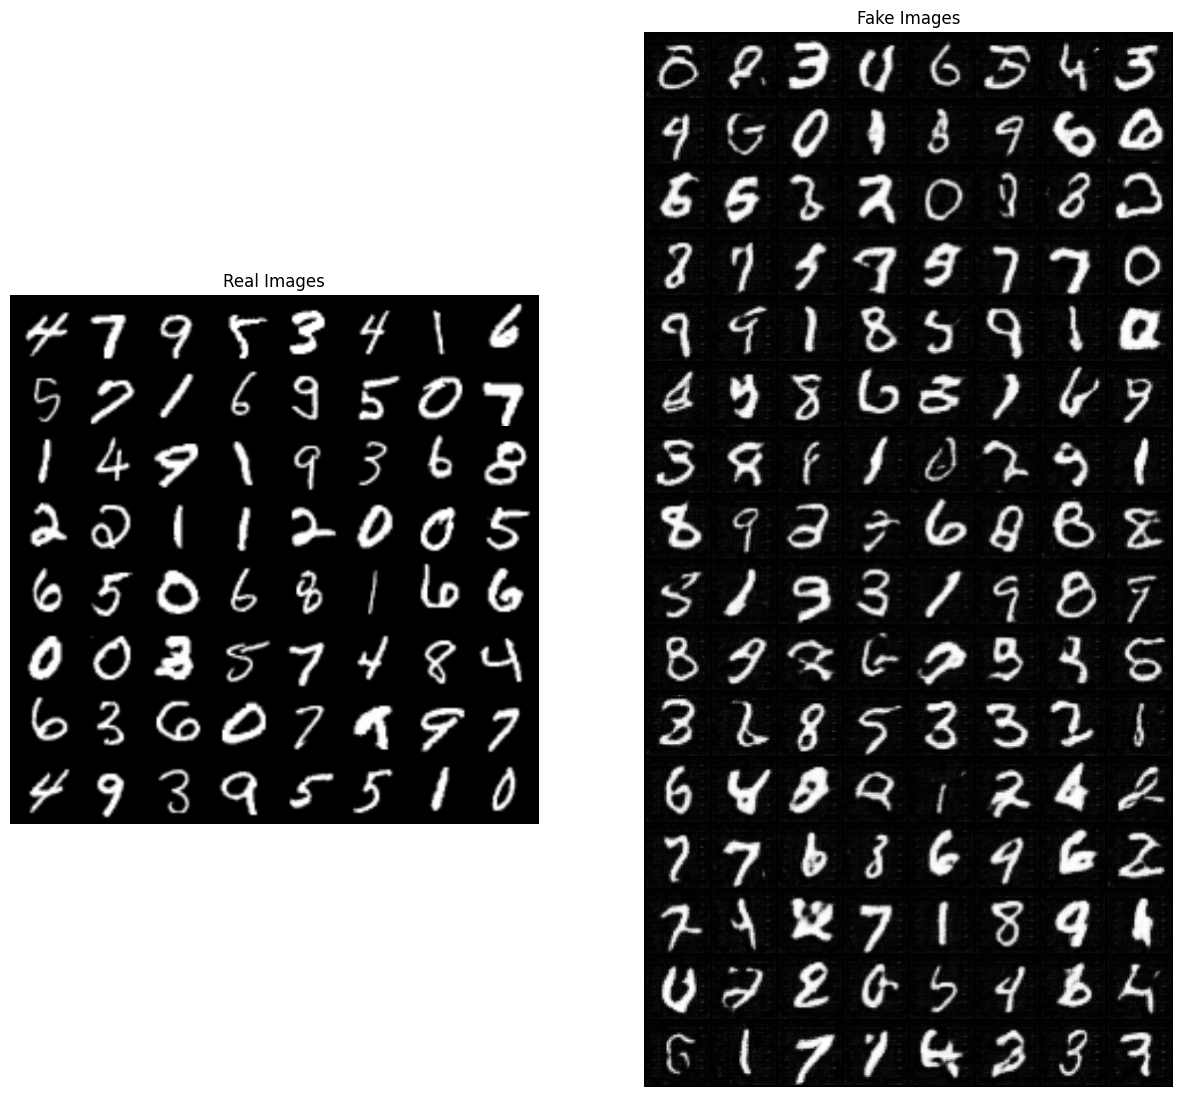

In [29]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

## Applications of Generative Adversarial Networks (GANs)

Generative Adversarial Networks (GANs) have revolutionized the field of machine learning with their ability to generate high-quality, realistic data. They are used in a wide range of applications, showcasing their versatility and power. Here are some exciting applications of GANs:

### 1. **Image Generation**

GANs can create photorealistic images from random noise or specific inputs. This has applications in various fields, including:

- **Art and Creativity**: Generating new artworks, styles, and designs.
- **Entertainment**: Creating realistic characters and scenes in games and movies.
- **Deepfakes**: Generating synthetic media with realistic human faces for both creative and deceptive purposes.

### 2. **Data Augmentation**

In scenarios with limited data, GANs can generate additional training samples to improve the performance of other machine learning models. This is particularly useful in:

- **Medical Imaging**: Creating synthetic medical images for training diagnostic algorithms.
- **Autonomous Vehicles**: Generating diverse driving scenarios to enhance self-driving car systems.

### 3. **Style Transfer**

GANs can transfer the style of one image to another while preserving the content. This is used in:

- **Photography**: Applying artistic styles to photos.
- **Film and Animation**: Converting scenes to different artistic styles.

### 4. **Super-Resolution**

GANs can enhance the resolution of images, producing high-quality images from low-resolution inputs. This is beneficial in:

- **Satellite Imaging**: Improving the clarity of satellite images for better analysis.
- **Medical Imaging**: Enhancing the quality of medical scans for better diagnosis.

### 5. **Image Inpainting and Restoration**

GANs can restore missing or corrupted parts of images, which is valuable in:

- **Historical Restoration**: Repairing old photographs or artworks.
- **Forensics**: Recovering damaged evidence.

## Exploring GFPGAN: Face Restoration with GANs

One of the fascinating applications of GANs is in face restoration, where GANs can improve the quality and detail of facial images. **GFPGAN (Generative Facial Prior-Generative Adversarial Network)** is a state-of-the-art model designed specifically for face restoration. Let's dive into how GFPGAN works and why it’s so exciting!

### What is GFPGAN?

GFPGAN is a deep learning model that leverages GANs to restore and enhance facial images. It focuses on improving image quality by filling in missing details, enhancing resolution, and correcting distortions. The model is particularly effective in:

- **Restoring Old Photographs**: Enhancing vintage or damaged photos to bring them back to life.
- **Improving Low-Resolution Images**: Boosting the quality of low-resolution face images to make them clearer and more detailed.
- **Correcting Distortions**: Fixing issues caused by compression artifacts or other distortions.

### How Does GFPGAN Work?

GFPGAN combines several advanced techniques to achieve high-quality face restoration:

1. **Facial Prior**: The model uses a pre-trained facial prior that captures essential features of human faces. This helps the model generate realistic and coherent facial details.

2. **Two-Stage Restoration**:
   - **Stage 1**: The model first performs a coarse restoration using a GAN-based architecture to generate a high-quality image from the low-resolution input.
   - **Stage 2**: It refines the image further using a detail enhancement network to add finer details and correct any remaining artifacts.

3. **Attention Mechanism**: GFPGAN uses attention mechanisms to focus on important facial features, ensuring that the restored image preserves key characteristics and looks natural.

### Why is GFPGAN Exciting?

GFPGAN represents a significant leap in face restoration technology. Here’s why it’s so exciting:

- **High-Quality Restorations**: GFPGAN produces stunningly realistic face images with enhanced clarity and detail.
- **Versatile Applications**: It’s useful in various fields, from restoring historical photographs to improving security footage.
- **User-Friendly**: The model can be applied to different types of face images with minimal setup, making it accessible for both researchers and enthusiasts.

### Try GFPGAN

To experience GFPGAN in action, you can explore its implementation on platforms like [GitHub](https://github.com/TencentARC/GFPGAN) and see how it performs on your own images. The project provides pre-trained models and code to help you get started with face restoration.

---

GANs continue to push the boundaries of what’s possible in machine learning, and models like GFPGAN highlight their incredible potential. Whether you’re interested in enhancing old photos or generating realistic images, GANs offer exciting possibilities for innovation and creativity.
